### Homework-1

In [193]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

#### Fish Dataset

Bu veri setinde belli başlı balık türleri ve onların özellikleri bulunmaktadır. Göreviniz bu veri setini kullanarak bir sınıflandırma modeli oluşturmak ve bu modeli test etmektir.

In [194]:
fish_df = pd.read_csv('Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [195]:
fish_df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

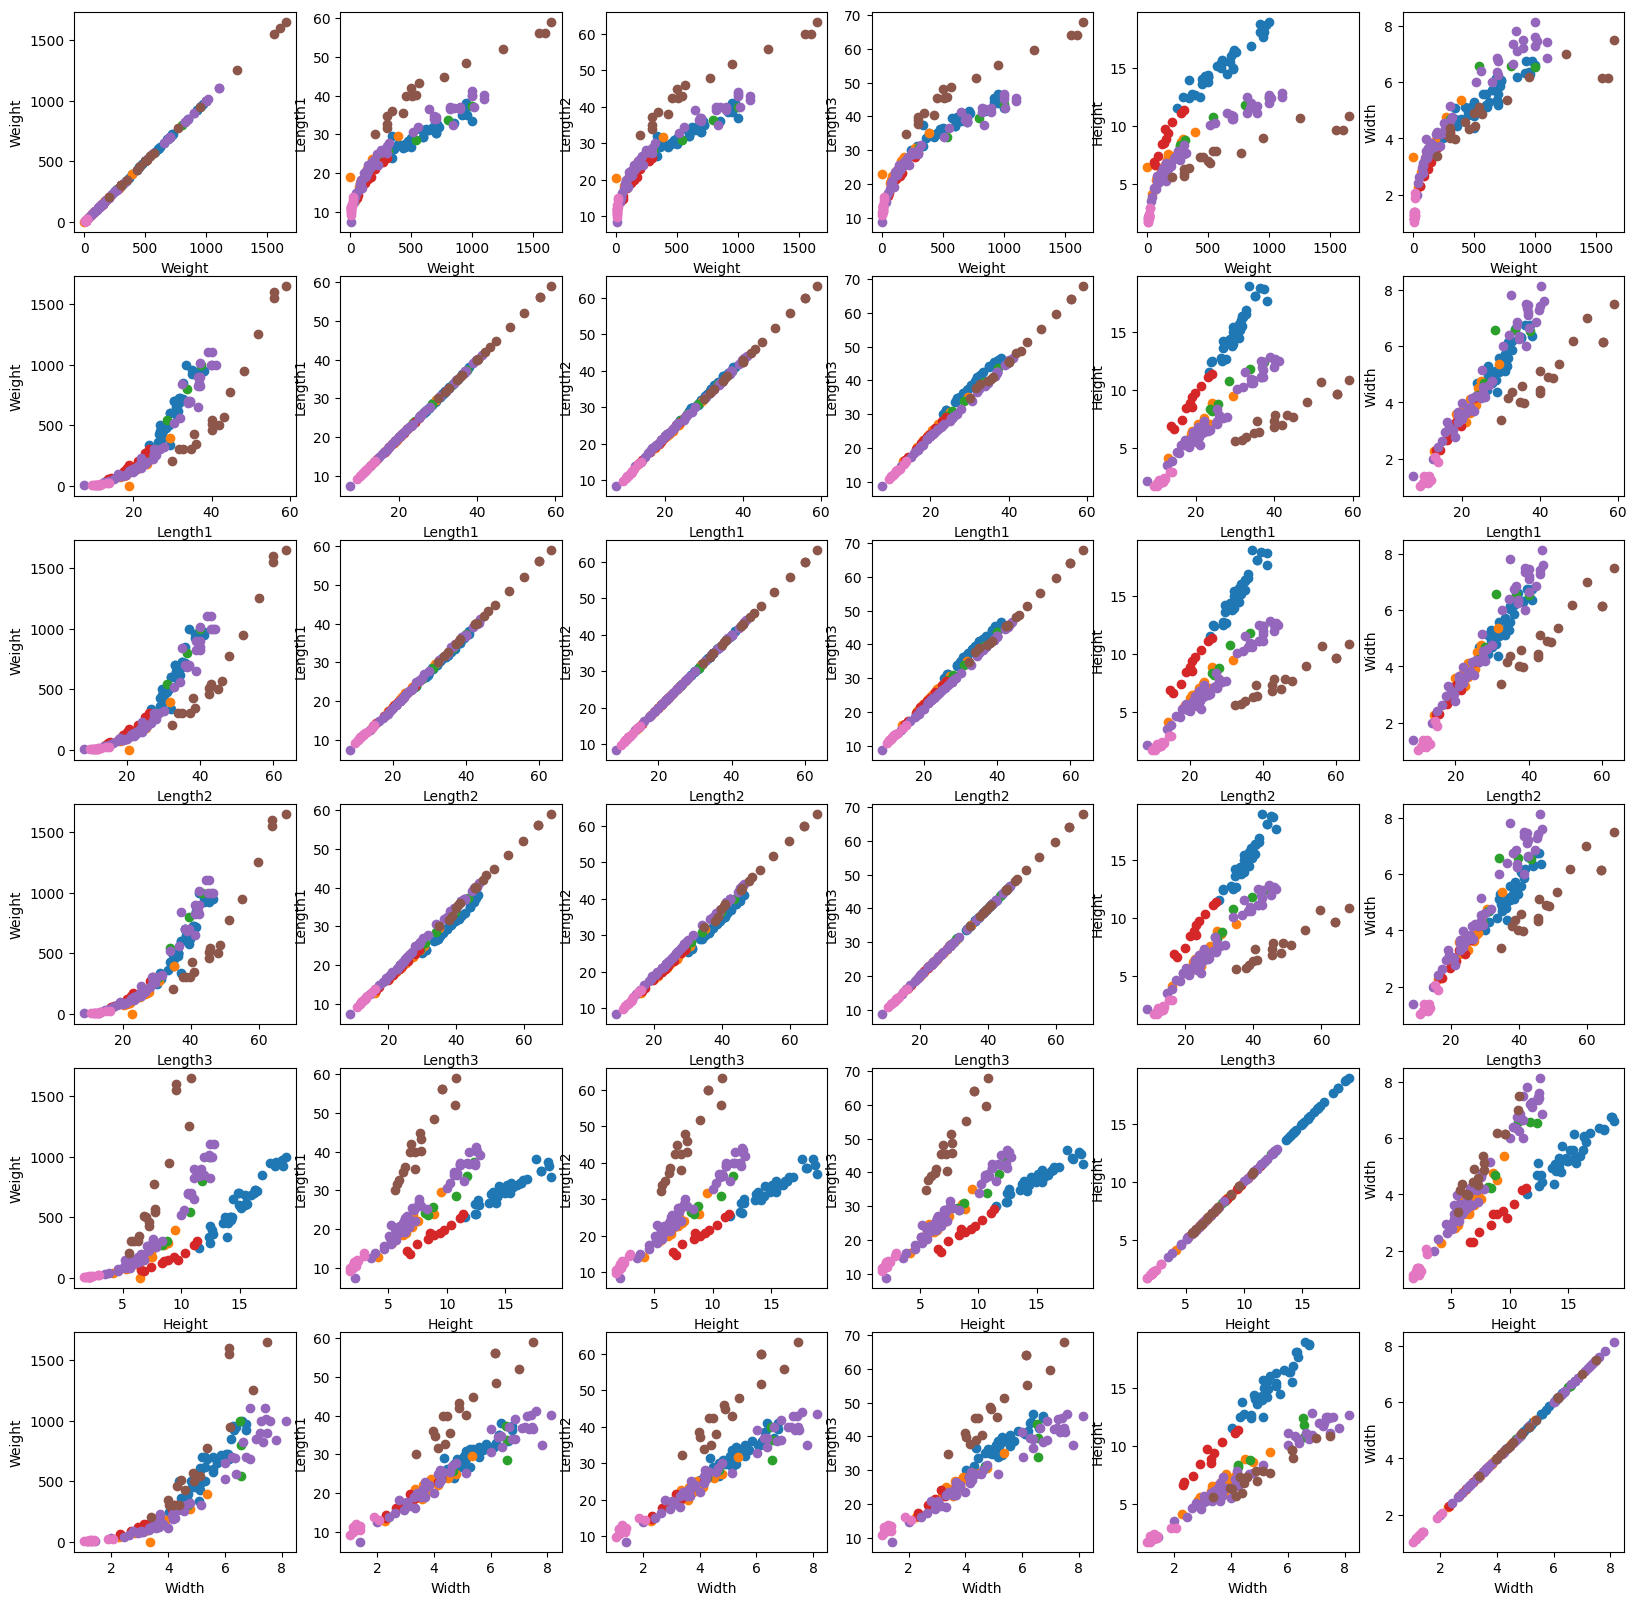

In [196]:
fig, ax = plt.subplots(6, 6, figsize=(20, 20))

for specie in fish_df.Species.unique():
    specie_df = fish_df.loc[fish_df.Species == specie].drop('Species', axis=1)

    for row_i, row_name in enumerate(specie_df.columns):
        for column_i, column_name in enumerate(specie_df.columns):
            ax[row_i, column_i].scatter(specie_df[row_name], specie_df[column_name], label=specie)
            ax[row_i, column_i].set(xlabel=row_name, ylabel=column_name)
plt.show()

In [197]:
X, y = fish_df.drop('Species', axis=1), fish_df['Species']

In [198]:
le = preprocessing.LabelEncoder()
le.fit(y)

le.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [199]:
y = le.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [200]:
scaler = preprocessing.MinMaxScaler()

X = scaler.fit_transform(X)
X

array([[1.46666667e-01, 3.04854369e-01, 3.09090909e-01, 3.58108108e-01,
        5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 3.25454545e-01, 3.78378378e-01,
        6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 3.74545455e-01, 4.17229730e-01,
        6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 3.74545455e-01, 4.25675676e-01,
        6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 3.87272727e-01, 4.37500000e-01,
        6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 3.87272727e-01, 4.34121622e-01,
        7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 3.92727273e-01, 4.42567568e-01,
        6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 3.92727273e-01, 4.44256757e-01,
        7.12565153e-01, 

In [201]:
pca = PCA(n_components=6)
X = pca.fit_transform(X)
X

array([[-5.52563911e-02, -1.73093874e-01, -6.86346844e-02,
        -5.62306824e-02,  7.39639342e-03,  3.77797226e-04],
       [ 1.87229415e-02, -2.04692527e-01, -6.47731462e-02,
        -5.39977171e-02,  8.03614872e-03,  4.88874732e-04],
       [ 5.44449234e-02, -2.01209696e-01, -1.59369207e-02,
        -3.65892022e-02,  1.16538393e-02, -3.22266173e-03],
       [ 1.03649433e-01, -1.73142778e-01, -8.06016098e-02,
        -4.94373922e-02,  2.25837046e-03, -3.46913220e-03],
       [ 1.62745423e-01, -1.60342606e-01,  2.96000548e-03,
        -3.23752086e-02,  1.68208897e-02,  4.94628702e-04],
       [ 1.94043216e-01, -2.03240585e-01, -5.12982910e-02,
        -2.84092331e-02,  9.83448782e-03, -4.32717006e-03],
       [ 2.42330747e-01, -2.33050213e-01, -1.94101975e-02,
        -1.23269206e-02,  7.57522219e-03, -4.10307673e-03],
       [ 1.50555152e-01, -1.51101456e-01, -6.67301561e-02,
        -5.62724253e-02,  7.60069016e-03,  1.88040125e-03],
       [ 2.08862921e-01, -2.12944502e-01, -7.486

In [202]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

scores = cross_val_score(reg, X, y, cv=5)
scores.mean()

0.6022177419354839

In [203]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

scores = cross_val_score(rfc, X, y, cv=5)
scores.mean()

0.917741935483871

In [204]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(rfc)

scores = cross_val_score(bc, X, y, cv=5)
scores.mean()

0.9112903225806452

#### Real Estate Dataset

Bu veri setinde ise belli başlı ev özellikleri ve onların fiyatları bulunmaktadır. Göreviniz bu veri setini kullanarak bir regresyon modeli oluşturmak ve bu modeli test etmektir.

In [205]:
real_estate_df = pd.read_csv('Real estate.csv')
real_estate_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


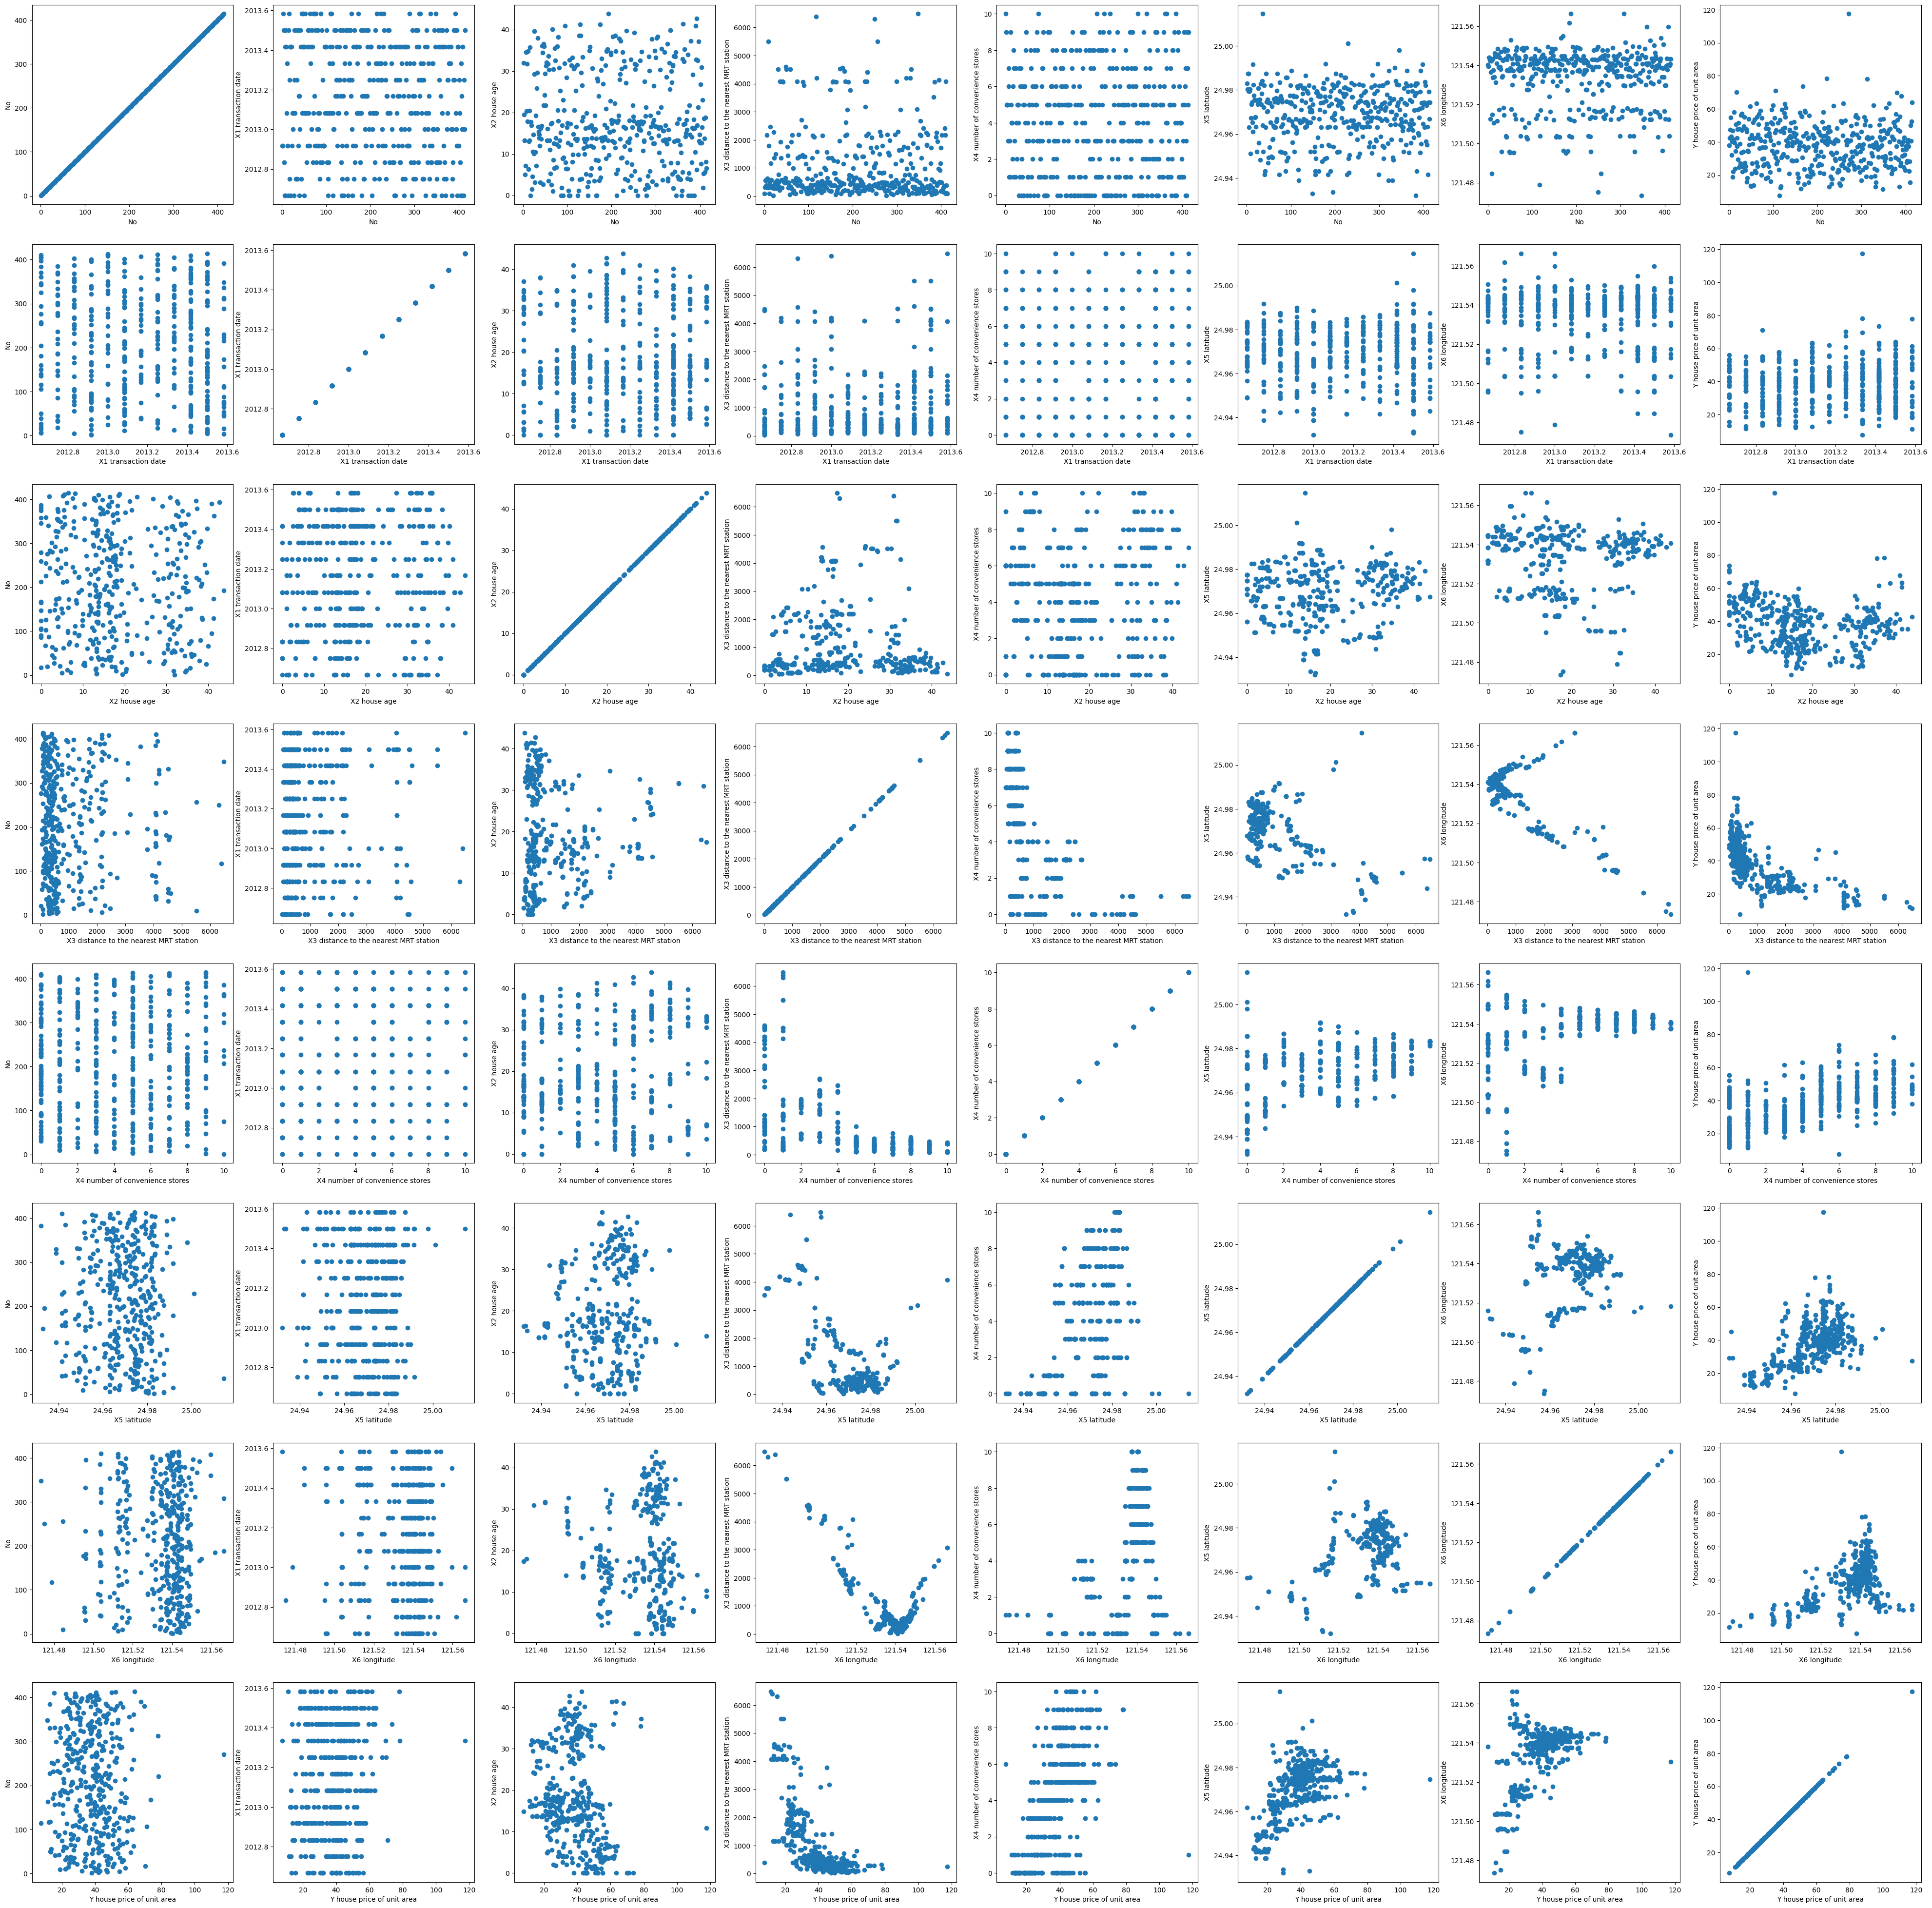

In [206]:
fig, ax = plt.subplots(len(real_estate_df.columns), len(real_estate_df.columns), figsize=(50, 50))

for row_i, row_name in enumerate(real_estate_df.columns):
    for column_i, column_name in enumerate(real_estate_df.columns):
        ax[row_i, column_i].scatter(real_estate_df[row_name], real_estate_df[column_name])
        ax[row_i, column_i].set(xlabel=row_name, ylabel=column_name)

plt.show()

In [207]:
real_estate_df = real_estate_df.drop(['No', 'X5 latitude', 'X6 longitude'], axis=1)
real_estate_df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


In [208]:
X, y = real_estate_df.drop('Y house price of unit area', axis=1), real_estate_df['Y house price of unit area']

In [209]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.27292576, 0.73059361, 0.00951267, 1.        ],
       [0.27292576, 0.44520548, 0.04380939, 0.9       ],
       [1.        , 0.30365297, 0.08331505, 0.5       ],
       ...,
       [0.63646288, 0.42922374, 0.05686115, 0.7       ],
       [0.36353712, 0.18493151, 0.0125958 , 0.5       ],
       [0.90938865, 0.14840183, 0.0103754 , 0.9       ]])

In [210]:
pca = PCA(n_components=4)
X = pca.fit_transform(X)
X

array([[-0.63483238,  0.17964667,  0.30236958,  0.12841195],
       [-0.51072316,  0.20650785,  0.02578902,  0.12951603],
       [-0.07248149, -0.47168882, -0.13970899, -0.04609342],
       ...,
       [-0.29855309, -0.13602924, -0.00307918,  0.03254265],
       [-0.14678705,  0.16925203, -0.22463832, -0.07142153],
       [-0.45491347, -0.40666429, -0.31099577,  0.08736803]])

In [211]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

scores = cross_val_score(reg, X, y, cv=5)
scores.mean()

0.5599084880590015

In [212]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1000)

scores = cross_val_score(rf, X, y, cv=5)
scores.mean()

0.6351447273099767

In [213]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor(rf)

scores = cross_val_score(br, X, y, cv=5)
scores.mean()

0.6449982060149155